<b><font size="6">Ensemble - Part II (SOLUTION)</font><a class="anchor"><a id='toc'></a></b><br>

[<font color='#E8800A'>1. AdaBoost</font>](#one-bullet) <br>
[<font color='#E8800A'>1.1 The base estimator</font>](#two-bullet) <br>
[<font color='#E8800A'>1.2 The number of estimators</font>](#three-bullet) <br>
[<font color='#E8800A'>1.3 The learning rate</font>](#four-bullet) <br>
[<font color='#E8800A'>1.4 The algorithm</font>](#five-bullet) <br>

[<font color='#E8800A'>2. GradientBoosting</font>](#six-bullet)<br>
[<font color='#E8800A'>2.1 The learning rate</font>](#seven-bullet)<br>
[<font color='#E8800A'>2.2 The number of estimators</font>](#eight-bullet)<br>
[<font color='#E8800A'>2.3 The number of samples</font>](#nine-bullet)<br>
[<font color='#E8800A'>2.4 The number of features</font>](#ten-bullet)<br>

[<font color='#E8800A'>3. Stacking (EXERCISE)</font>](#eleven-bullet)<br>

__`Step 1`__ Import all the needed packages. Assign to the object `diabetes` the dataset __diabetes.csv__ and define the independent variables and the target as `X` and `y`, respectively.

In [1]:
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

diabetes = pd.read_csv('diabetes.csv')
X = diabetes.drop(['Outcome'], axis=1)
y = diabetes['Outcome']

__`Step 2`__ Create an instance of RepeatedStratifiedKFold named as `cv` and define the number of splits equal to 10, the repetitions equal to 3, and the random state equal to 1. 

In [2]:
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

__`Step 3`__ Create a function named as `return_f1score` that will receive as parameters a model instance, the independent variables and the target. <br>
This will return the output of a `cross_val_score` from your model, with the scoring defined as f1 and where you apply the RepeatedStratifiedKFold defined in the previous step.

This function will allow us to obtain the f1 score for all the models we are going to create on the notebook, and each model instance is going to be trained for 30 times, using the RepeatedStratifiedKFold.

In [3]:
def return_f1score(model, X, y):
    n_scores = cross_val_score(model, X, y, scoring = 'f1', cv = cv)
    return n_scores

__`Step 4`__ Create a function named as `return_results` that will receive as parameters all the models instances and is going to return the f1 scores from the previous function, and make a boxplot of the results for all the model instances.

In [4]:
def return_results(models):
    results, names = [],[]
    for name, model in models.items():
        scores = return_f1score(model, X, y)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
    
    plt.figure(figsize=(15,7))
    plt.boxplot(results, labels = names, showmeans = True)
    plt.xticks(fontsize=14)
    plt.show()

<div class="alert alert-block alert-info">

# <font color='#E8800A'>1. AdaBoost</font> <a class="anchor" id="one-bullet"></a>
    
</div>


  [Back to TOC](#toc)
  
### The difference between RF and AdaBoost



- In a Random Forest, each time you make a tree, by default you make a full grown up tree;
- In Adaboost, the trees are usually just a node and two leaves (also denominated as stump); Stumps use only one variable to make a decision. They are weak learners.
<h5><center>Adaboost combines a lot of weak learners to make classifications. The weak learners are almost always stumps.</center></h5>
<hr>
    
- In a Random Forest, each tree has an equal vote on the final classification;
- In AdaBoost, some stumps have more weight on voting than others.
<h5><center>In adaboost, some stumps get more say in the classification than others.</center></h5>
<hr>



- In a Random Forest, each decision tree is made independently of the others;
- In a Forest of Stumps made with AdaBoost, order is important - the errors that the first stump makes influence how the second stump is made and so on.
<h5><center>In adaboost, each stump is made by taking the previous stump's mistakes into account.</center></h5>
<hr>

In [5]:
from sklearn.ensemble import AdaBoostClassifier

<div class="alert alert-block alert-warning">
    
## <font color='#E8800A'>AdaBoost in Classification</font>
    
<a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier'>sklearn.ensemble.AdaBoostClassifier(base_estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)</a>
<br><br>
__Definition:__ <br>
An AdaBoost classifier.

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

</div>

### <font color='#E8800A'>base_estimator |</font> <font color='#3a7f8f'>The base estimator from which the boosted ensemble is built. </font> <a class="anchor" id="two-bullet"></a><br><br>`default = None | DecisionTreeClassifier with max_depth = 1`

- A decision tree with one level (a stump) is used as the weak learner by default.
- We can make the models used in the ensemble less weak (more skillful) by increasing the depth of the decision tree.

__`Step 5`__ Explore the effect of increasing the depth of the DecisionTreeClassifier weak learner on the AdaBoost ensemble.

>1 0.617 (0.067)
>2 0.592 (0.076)
>3 0.583 (0.067)
>4 0.588 (0.076)
>5 0.608 (0.076)
>6 0.618 (0.070)


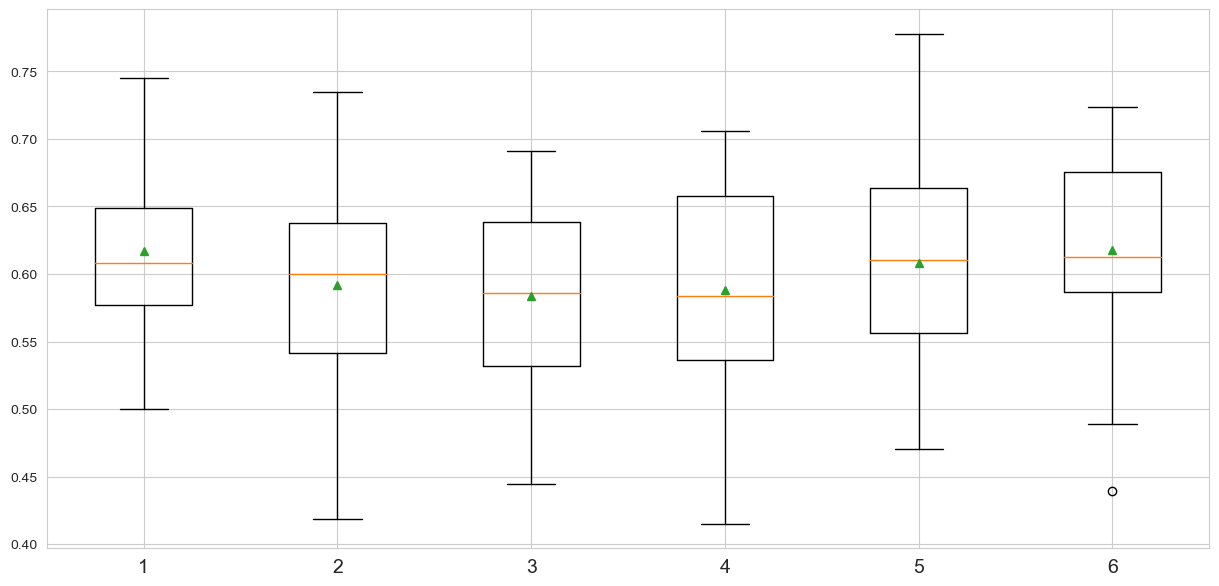

In [6]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth=value), random_state = 15)      
    return models

models = get_models([1,2,3,4,5,6])
return_results(models)

In this case, we can see that using the default (max_depth = 1) is the one with best results for all the tested values (higher mean and lower STD).

<hr>

#### Changing the algorithm

- The default algorithm used in the ensemble is a decision tree, although other algorithms can be used.

- The intent is to use very simple models, called weak learners. Also, the scikit-learn implementation requires that any models used must also support weighted samples, as they are how the ensemble is created by fitting models based on a weighted version of the training dataset.

- The base model can be specified via the “base_estimator” argument. The base model must also support predicting probabilities or probability-like scores in the case of classification.

__`Step 6`__ Compare the results when you define the base_estimator a LogisticRegression and the default version.

>ad_LR 0.632 (0.076)
>ad_def 0.617 (0.067)


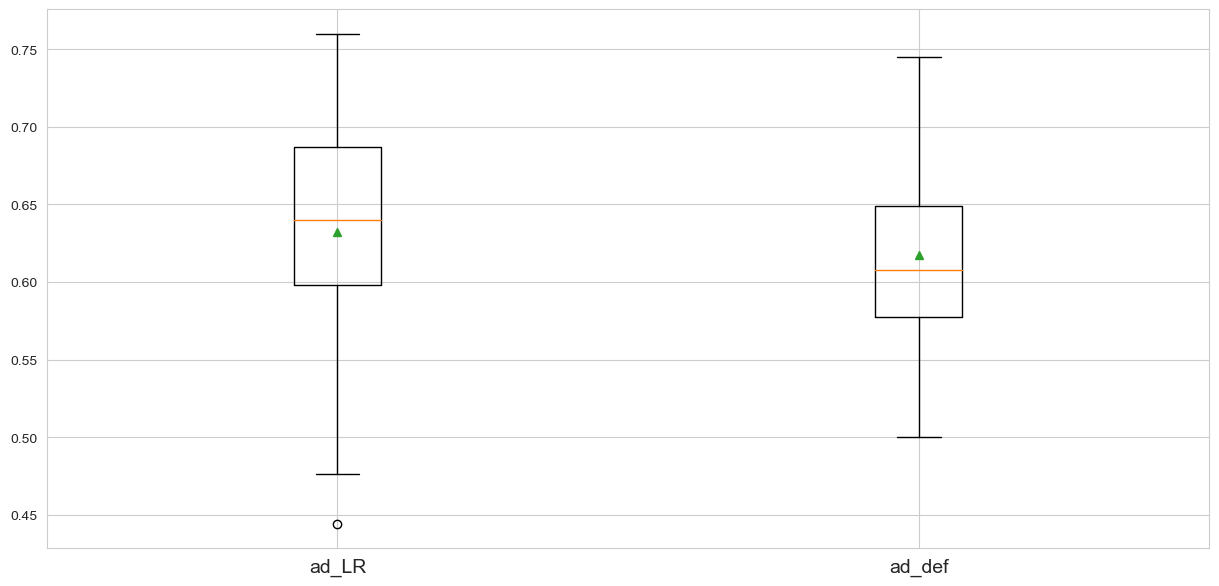

In [7]:
from sklearn.linear_model import LogisticRegression

def get_models():
    models = dict()
    models['ad_LR'] = AdaBoostClassifier(estimator = LogisticRegression(max_iter=500), random_state = 15)  
    models['ad_def'] = AdaBoostClassifier(random_state = 15)  
    return models

models = get_models()
return_results(models)

### <font color='#E8800A'>n_estimators |</font> <font color='#3a7f8f'>The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early. </font> <a class="anchor" id="three-bullet"></a><br><br><br>`default = 50`

Depending of the complexity of the data, the number of trees added to the model sometimes needs to be high for the model to work well, often hundreds, if not thousands.

__`Step 7`__ Compare the results of your models when you define different values for the number of estimators.

>2 0.551 (0.117)
>5 0.582 (0.090)
>10 0.606 (0.079)
>20 0.629 (0.076)
>30 0.609 (0.076)
>50 0.617 (0.067)
>100 0.613 (0.082)
>150 0.615 (0.084)


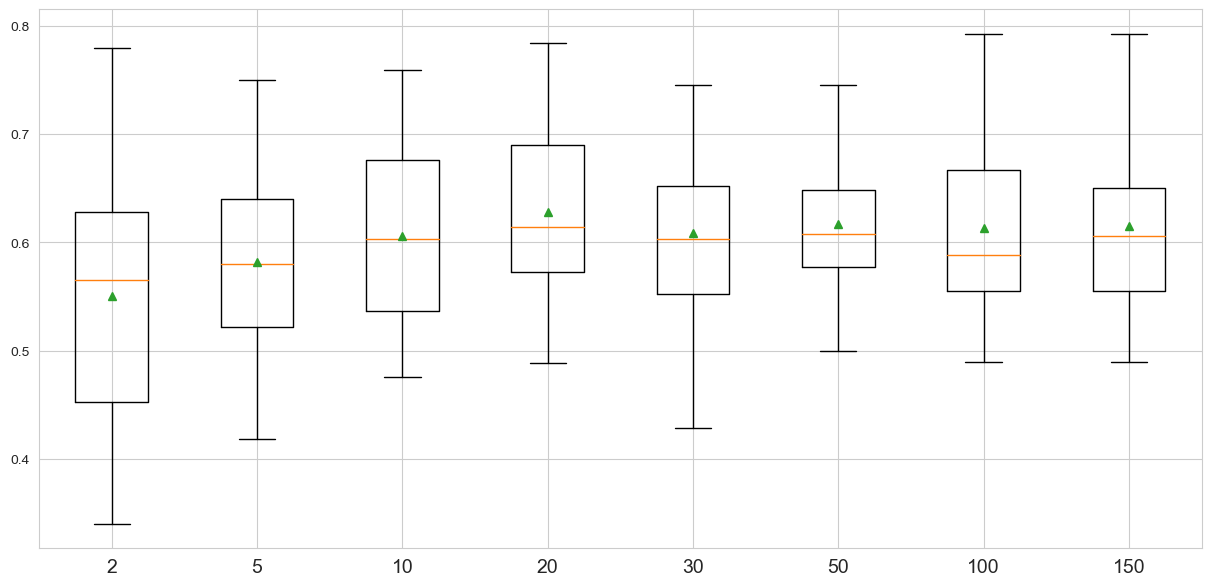

In [8]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = AdaBoostClassifier(n_estimators = value, random_state = 15)      
    return models

models = get_models([2,5,10,20,30,50,100,150])
return_results(models)

In this case, we can see that using only 20 estimators is the best value for all the tested values.

### <font color='#E8800A'>learning_rate |</font> <font color='#3a7f8f'>Weight applied to each classifier at each boosting iteration. A higher learning rate increases the contribution of each classifier. There is a trade-off between the learning_rate and n_estimators parameters. </font> <a class="anchor" id="four-bullet"></a><br><br><br>`default = 1.0`

- AdaBoost also supports a learning rate that controls the contribution of each model to the ensemble prediction. This is controlled by the “learning_rate” argument and by default is set to 1.0 or full contribution. 

- Smaller or larger values might be appropriate depending on the number of models used in the ensemble. There is a balance between the contribution of the models and the number of trees in the ensemble:
    - More trees may require a smaller learning rate; 
    - Fewer trees may require a larger learning rate. 
    
- It is common to use values between 0 and 1 and sometimes very small values to avoid overfitting such as 0.1, 0.01 or 0.001.

__`Step 8`__ Compare the results of your models when you define different values for the learning rate.

>0.1 0.589 (0.091)
>0.2 0.609 (0.074)
>0.3 0.615 (0.067)
>0.4 0.624 (0.068)
>0.5 0.612 (0.078)
>0.6 0.613 (0.073)
>0.7 0.612 (0.074)
>0.8 0.614 (0.063)
>0.9 0.607 (0.069)
>1.0 0.617 (0.067)


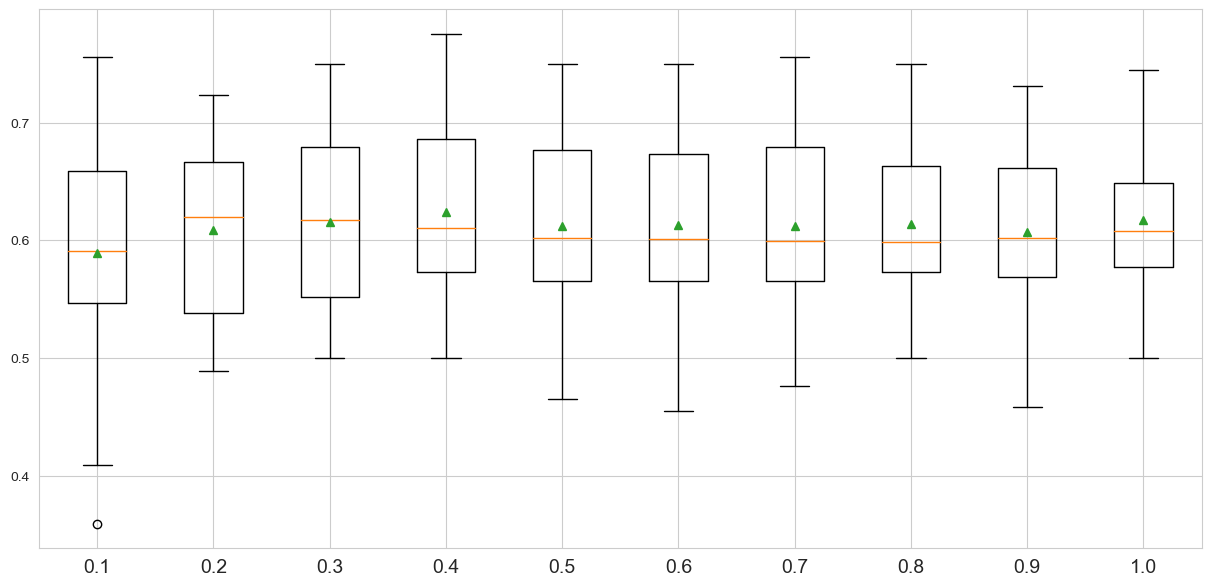

In [9]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = AdaBoostClassifier(learning_rate = value, random_state = 15)      
    return models

models = get_models([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
return_results(models)

Using the default number of estimators (50 stumps), it seems that a learning rate of 0.4 is adequate.

What if we decrease the number of estimators to 20 stumps, the value that gave us the best results in step 7?

__`Step 9`__ Compare the results of your models when you define different values for the learning rate, and when the number of estimators is 20.

>0.1 0.548 (0.107)
>0.2 0.594 (0.079)
>0.3 0.606 (0.079)
>0.4 0.613 (0.080)
>0.5 0.617 (0.079)
>0.6 0.610 (0.070)
>0.7 0.617 (0.082)
>0.8 0.617 (0.075)
>0.9 0.624 (0.070)
>1.0 0.629 (0.076)


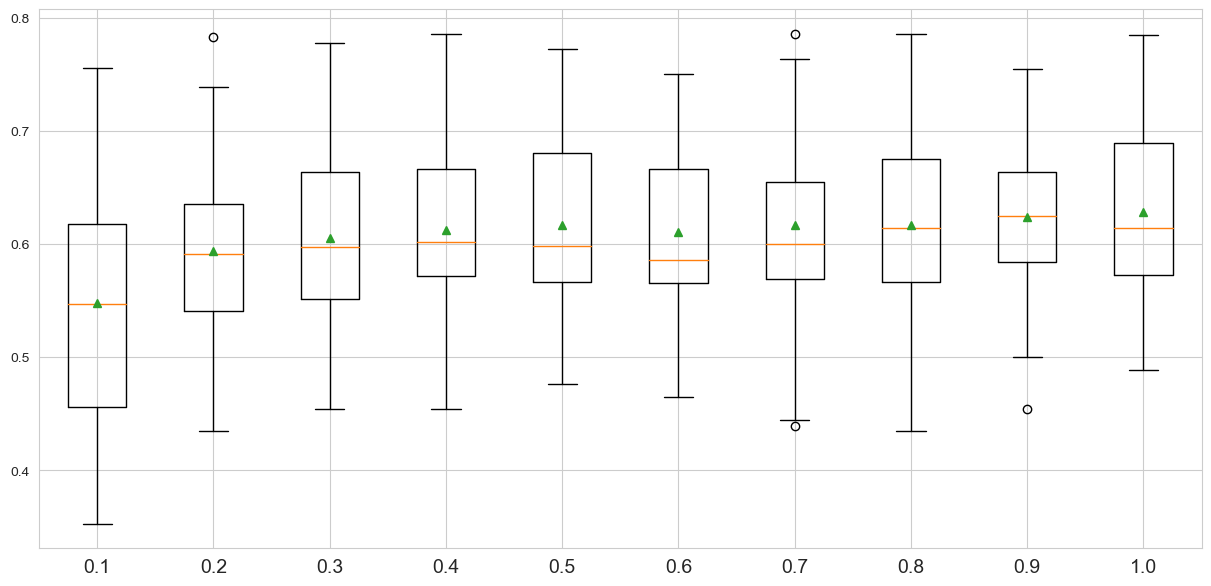

In [10]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = AdaBoostClassifier(learning_rate = value, n_estimators = 20, random_state = 15)      
    return models

models = get_models([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
return_results(models)

As we can verify by the results, a smaller number of estimators could demand an higher learning rate - having only 20 estimators, the best learning rate increases to 1.0.

### <font color='#E8800A'>algorithm |</font> <font color='#3a7f8f'>If ‘SAMME.R’ then use the SAMME.R real boosting algorithm. base_estimator must support calculation of class probabilities. If ‘SAMME’ then use the SAMME discrete boosting algorithm.  </font> <a class="anchor" id="five-bullet"></a><br><br><br>`default = "SAMME.R"`

By default, AdaBoost uses SAMME.R algorithm, where AdaBoost use the predicted class probabilities to adapt based on the error. You can also use the SAMME algorithm, where instead of using the probabilities, you use the predicted class labels. 

The SAMME.R algorithm typically converges faster than SAMME, achieving a lower test error with fewer boosting iterations.

__`Step 10`__ Check if SAMME.R is the best solution for your dataset.

>SAMME 0.616 (0.075)
>SAMME.R 0.617 (0.067)


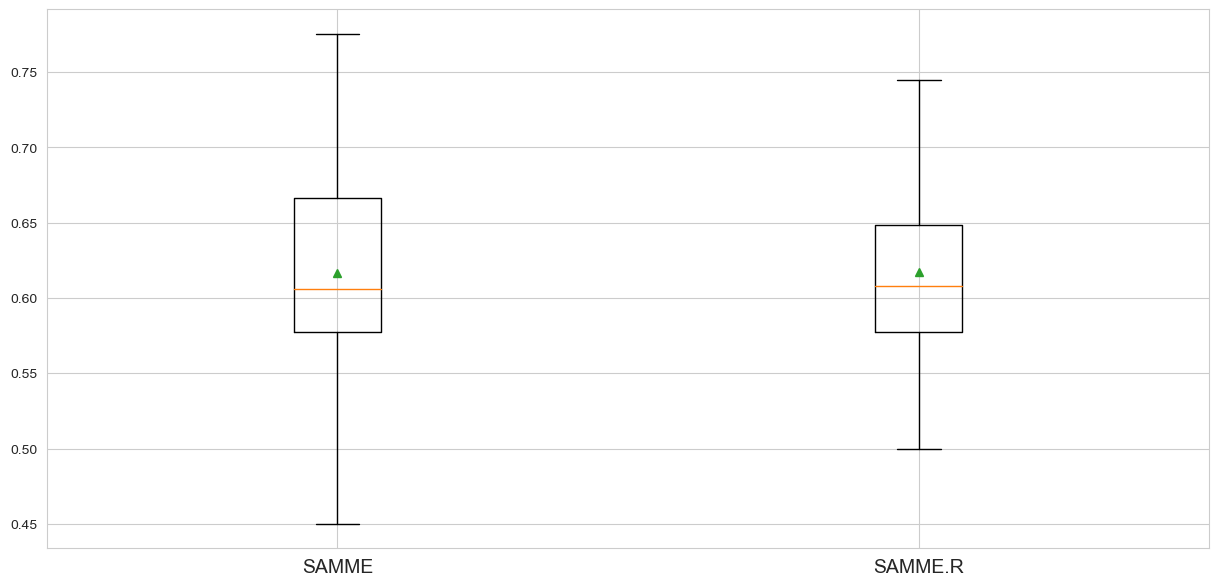

In [11]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = AdaBoostClassifier(algorithm = value, random_state = 15)      
    return models

models = get_models(["SAMME","SAMME.R"])
return_results(models)

While the difference is not significant, we can see that SAMME.R algorithm performs better in our problem.

<div class="alert alert-block alert-info">

# <font color='#E8800A'>2. GradientBoosting</font> <a class="anchor" id="six-bullet"></a>
    
</div>


  [Back to TOC](#toc)
  

### The difference between RF and GradientBoosting


- In a Random Forest, each tree is built independently;
- Gradient Boosting build one tree at a time, working in a forward stage-wise manner;



- When combining results, in a Random Forest, we combine results at the end of the process (by averaging or "majority rules");
- When combining results, in Gradient Boosting, the results are combined along the way;



- In a Random Forest, the process of fine-tuning can be easier to achieve;
- In Gradient Boosting, you can achieve better results than RF, but they are harder to tune and sensible when you have a lot of noise data.

## What is Gradient Boosting?

- Gradient Boosting is a boosting ensemble algorithm similar to AdaBoost in many regards:
1. It can be used for both classification and regression problems;
2. It sequentially adds predictors to an ensemble, each one correcting its predecessor;

- However, instead of tweaking the instance weights at every iteration like AdaBoost does, this method tries to fit the new predictor to the `residual errors` made by the previous predictor. These `residual errors` are the differences between the target values (y) and the predictions made by the previous predictor (y - y_pred) on each sample. Moreover, Gradient Boosting uses `Gradient Descent` technique to minimize the loss when adding new models, something that AdaBoost does not do.


<div class="alert alert-block alert-warning">
    
## <font color='#E8800A'>GradientBoosting in Classification</font>
    
<a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier'>sklearn.ensemble.GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None,...)</a>
<br><br>
__Definition:__ <br>
Gradient Boosting for classification.<br>
GradientBoosting builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. 
</div>

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

### <font color='#E8800A'>learning_rate |</font> <font color='#3a7f8f'>Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators. </font> <a class="anchor" id="seven-bullet"></a><br><br><br>`default = "0.1"`

- Learning rate controls the amount of contribution that each model has on the ensemble prediction.

- Smaller rates may require more decision trees in the ensemble, whereas larger rates may require an ensemble with fewer trees. - It is common to explore learning rate values on a log scale, such as between a very small value like 0.0001 and 1.0.


__`Step 11`__ Compare the results when defining learning rate in the values [0.001, 0.01, 0.1, 0.3, 0.5, 0.8, 1.0]

>0.001 0.000 (0.000)
>0.01 0.551 (0.094)
>0.1 0.626 (0.075)
>0.3 0.612 (0.067)
>0.5 0.615 (0.076)
>0.8 0.591 (0.076)
>1.0 0.579 (0.074)


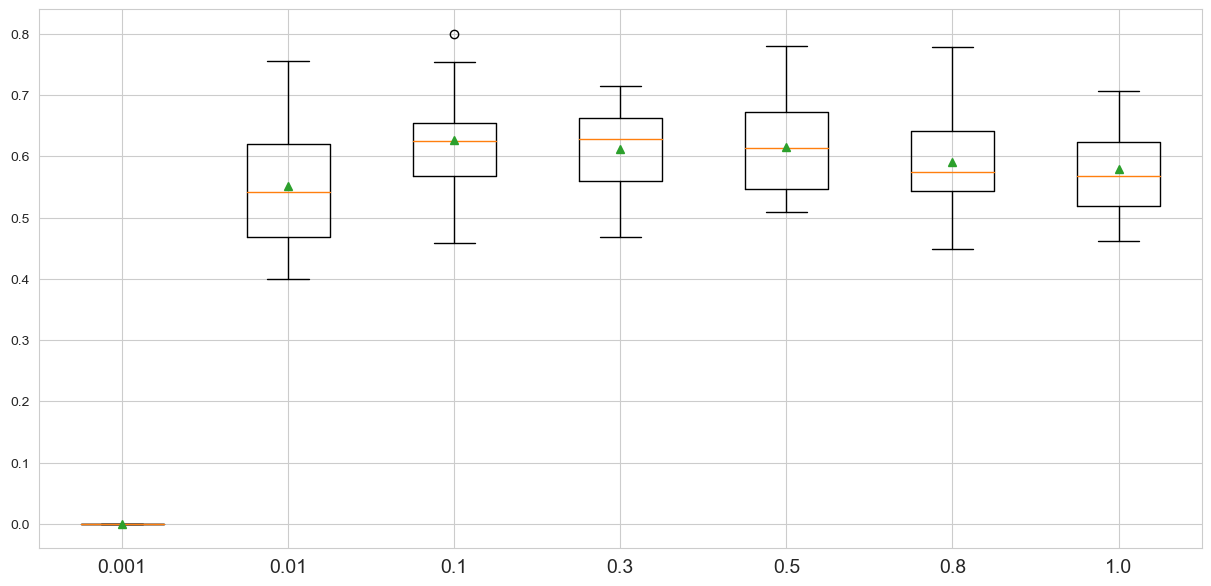

In [13]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(learning_rate = value, random_state = 15)      
    return models

models = get_models([0.001, 0.01, 0.1, 0.3, 0.5, 0.8, 1.0])
return_results(models)

In this case, we can see that a medium learning rate (the value of 0.1) results in better performance on this dataset. 

We would expect that adding more trees to the ensemble for the smaller learning rates would further lift performance.
This highlights the trade-off between the number of trees (speed of training) and learning rate, e.g. we can fit a model faster by using fewer trees and a larger learning rate.

__`Step 12`__ Compare the results when defining learning rate in the values [0.001, 0.01, 0.1, 0.3, 0.5, 0.8, 1.0] when the number of trees is 500 (by default is 100).

>0.001 0.408 (0.102)
>0.01 0.623 (0.078)
>0.1 0.610 (0.082)
>0.3 0.605 (0.080)
>0.5 0.600 (0.082)
>0.8 0.595 (0.088)
>1.0 0.586 (0.072)


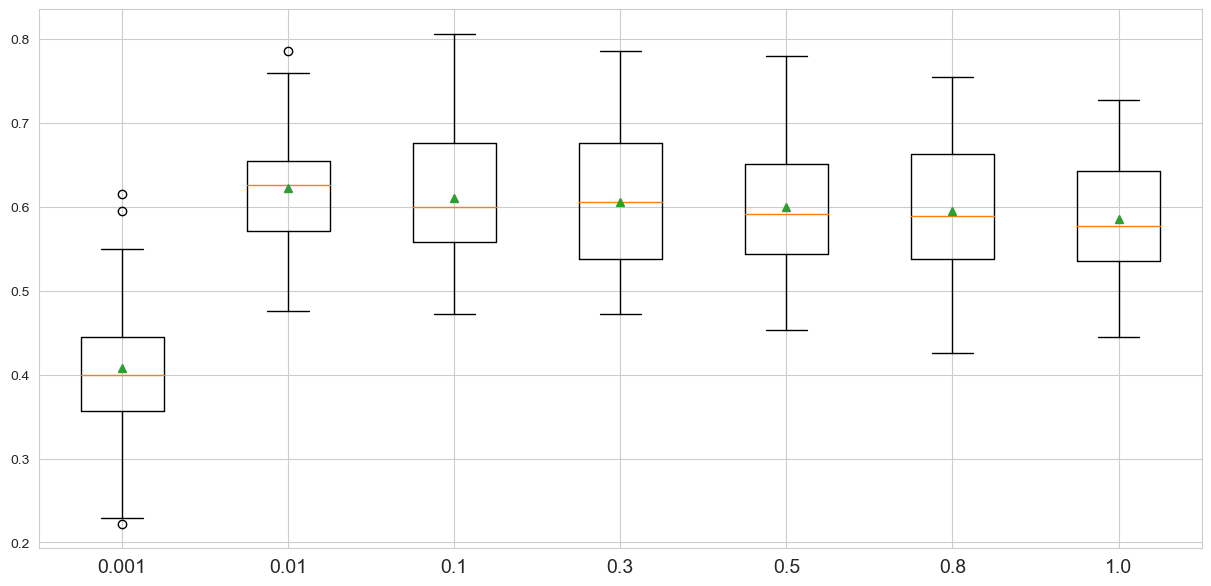

In [14]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(learning_rate = value, random_state = 15, n_estimators = 500)      
    return models

models = get_models([0.001, 0.01, 0.1, 0.3, 0.5, 0.8, 1.0])
return_results(models)

As expected, when increasing the number of estimators, we need to decrease the value of the learning rate.

### <font color='#E8800A'>n_estimators |</font> <font color='#3a7f8f'>The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance. </font> <a class="anchor" id="eight-bullet"></a><br><br><br>`default = 100`

- Recall that decision trees are added to the model sequentially in an effort to correct and improve upon the predictions made by prior trees. As such, more trees is often better. 
- The number of trees must also be balanced with the learning rate, e.g. more trees may require a smaller learning rate, fewer trees may require a larger learning rate.

__`Step 13`__ Check the effect of changing the number of trees with values between 2 to 200 ([2,5,10,20,30,50,100,150,200]).

>2 0.000 (0.000)
>5 0.424 (0.107)
>10 0.560 (0.094)
>20 0.610 (0.075)
>30 0.623 (0.062)
>50 0.628 (0.073)
>100 0.626 (0.075)
>150 0.626 (0.073)
>200 0.628 (0.076)
>500 0.610 (0.082)


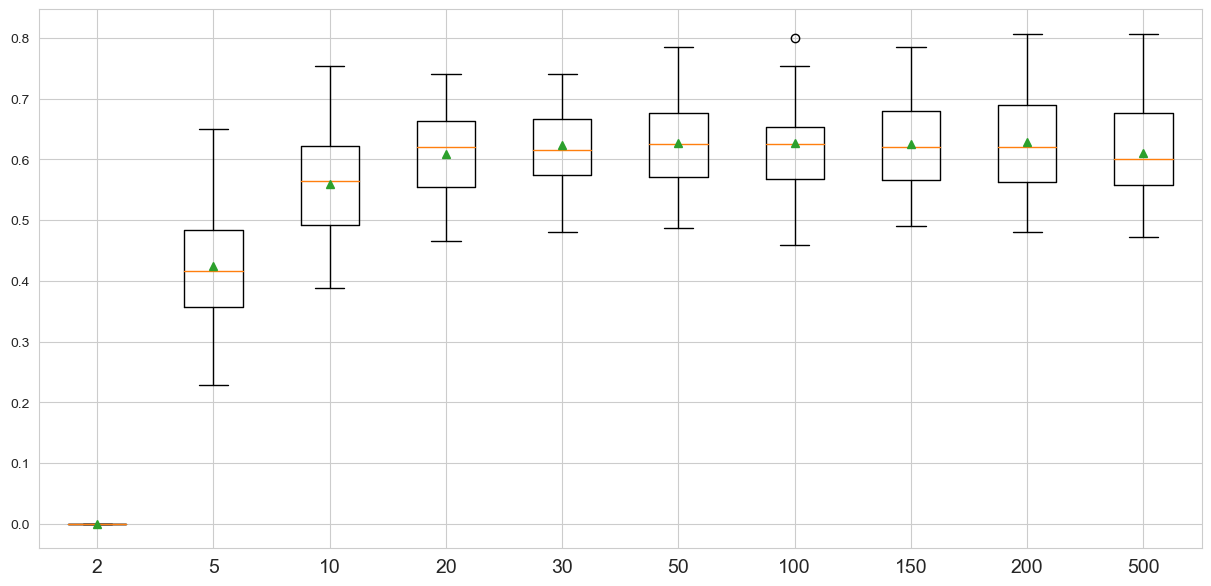

In [15]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(n_estimators = value, random_state = 15)      
    return models

models = get_models([2,5,10,20,30,50,100,150,200,500])
return_results(models)

From the results, we can verify that increasing the number of trees to a value around 50 to 200 seems to lead to better results. Do not forget that the number of trees should be balanced with the learning rate to get further improvements.

### <font color='#E8800A'>subsample |</font> <font color='#3a7f8f'>The fraction of samples to be used for fitting the individual base learners.  </font> <a class="anchor" id="nine-bullet"></a><br><br><br>`default = 1.0`

- Like in Bagging and in Random Forests, the number of samples used to fit each tree can be varied. This means that each tree is fit on a randomly selected subset of the training dataset.

- Using fewer samples introduces more variance for each tree, although it can improve the overall performance of the model.



__`Step 14`__ Check the effect of changing the number of samples used in each tree.

>0.2 0.618 (0.061)
>0.4 0.638 (0.066)
>0.6 0.640 (0.062)
>0.8 0.638 (0.071)
>1.0 0.626 (0.075)


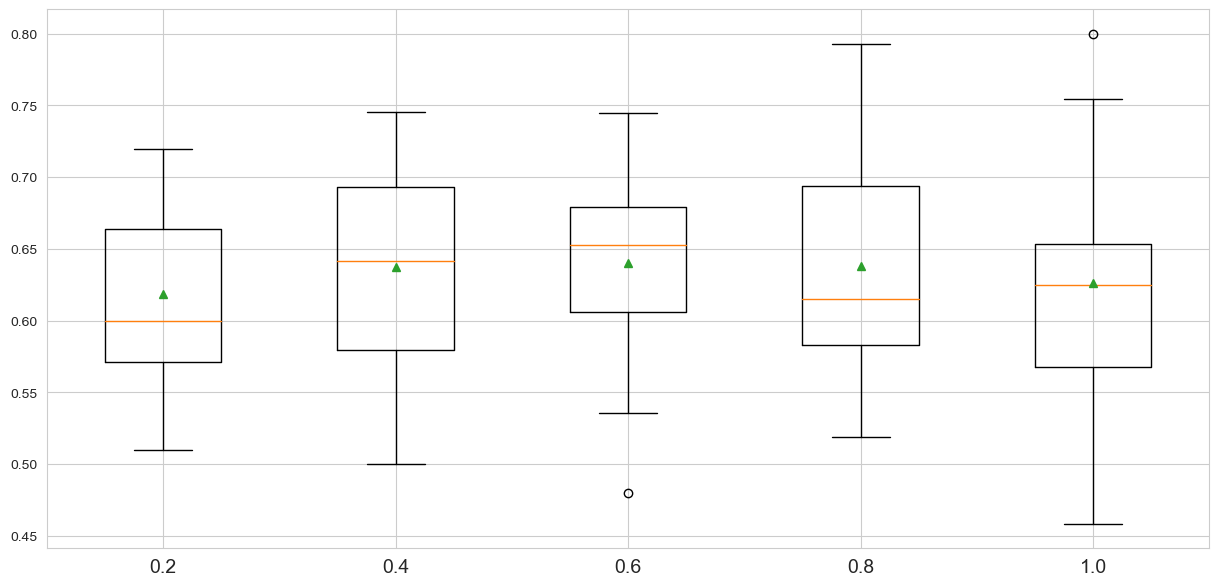

In [16]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(subsample = value, random_state = 15)      
    return models

models = get_models([0.2,0.4,0.6,0.8,1.0])
return_results(models)

For our dataset and looking at the results, using around 60% - 80% of the size of our training data to build each tree leads to better results.

### <font color='#E8800A'>max_features |</font> <font color='#3a7f8f'>The number of features to consider when looking for the best split. </font> <a class="anchor" id="ten-bullet"></a><br><br><br>`default = None`

- Similarly to the number of samples, the number of features used to fit each decision tree can be varied, and introduces additional variance into the model, which may improve performance, although it might require an increase in the number of trees.


__`Step 15`__ Compare the results of using just 2 features, half of the features, the sqrt(n_features), the log2(n_features) and all features in the construction of your trees.

>2 0.631 (0.080)
>0.5 0.625 (0.078)
>sqrt 0.631 (0.080)
>log2 0.622 (0.078)
>None 0.626 (0.075)


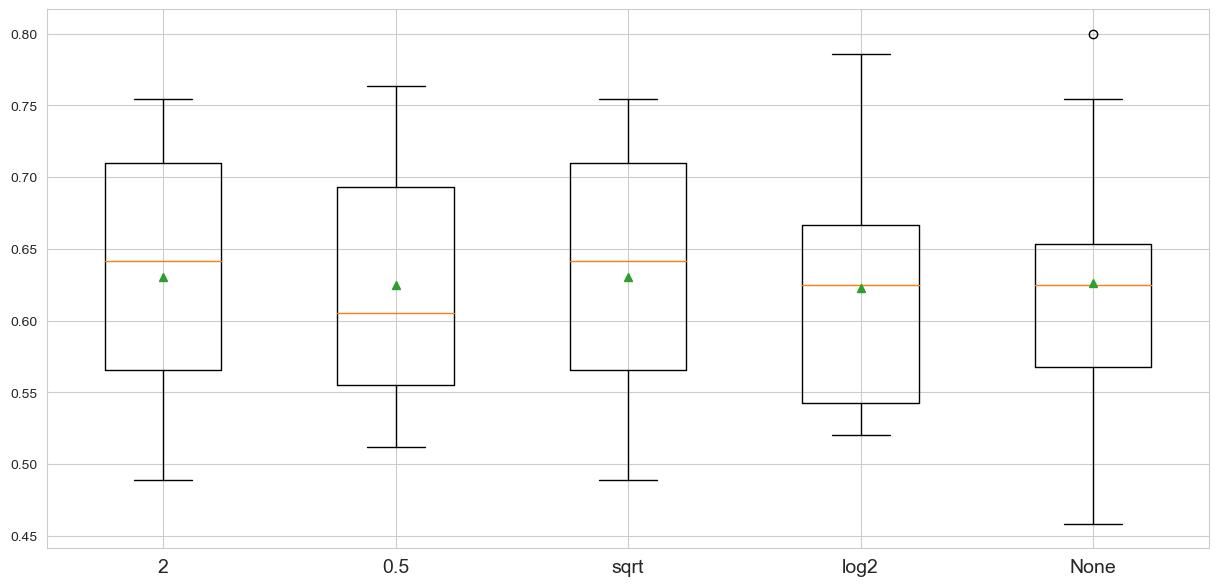

In [17]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(max_features = value, random_state = 15)      
    return models

models = get_models([2,0.5,'sqrt','log2',None])
return_results(models)

In our case, it seems that reduzing the number of features available for the building of each tree can be more beneficial than using all the features, since it is increasing the variance on the results. 

### Other parameters

|Parameter| Definition | Default |
|---|---|---|
|loss| The loss function to be optimized. ‘deviance’ refers to deviance (= logistic regression) for classification with probabilistic outputs. For loss ‘exponential’ gradient boosting recovers the AdaBoost algorithm. | 'deviance'|
| criterion | The function to measure the quality of a split. Supported criteria are ‘friedman_mse’ for the mean squared error with improvement score by Friedman, ‘mse’ for mean squared error, and ‘mae’ for the mean absolute error. | friedman_mse |
| min_samples_split | The minimum number of samples required to split an internal node. | 2 |
| min_samples_leaf | The minimum number of samples required to be at a leaf node. | 1 |
| min_weight_fraction_leaf | The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.  | 0.0 |
| max_depth | Maximum depth of the individual regression estimators. | 3 |
| min_impurity_decrease | A node will be split if this split induces a decrease of the impurity greater than or equal to this value. | 0.0 |
| min_impurity_split | Threshold for early stopping in tree growth. | None |
| init | An estimator object that is used to compute the initial predictions. | None |
| random_state | Controls the random seed given to each Tree estimator at each boosting iteration. | None |
| verbose | Enable verbose output. If 1 then it prints progress and performance once in a while (the more trees the lower the frequency). If greater than 1 then it prints progress and performance for every tree. | 0 |
| max_leaf_nodes | Grow trees with max_leaf_nodes in best-first fashion. | None |
| warm_start | When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just erase the previous solution. | False |
| validation_fraction | The proportion of training data to set aside as validation set for early stopping.Only used if n_iter_no_change is set to an integer. | 0.1 |
| n_iter_no_change | n_iter_no_change is used to decide if early stopping will be used to terminate training when validation score is not improving. | None |
| tol | Tolerance for the early stopping. When the loss is not improving by at least tol for n_iter_no_change iterations (if set to a number), the training stops. | 1e-4 |
| ccp_alpha | Complexity parameter used for Minimal Cost-Complexity Pruning. | 0.0 |

<div class="alert alert-block alert-info">

# <font color='#E8800A'>3. Stacking (EXERCISE)</font> <a class="anchor" id="eleven-bullet"></a>
    
</div>


  [Back to TOC](#toc)

<div class="alert alert-block alert-warning">
    
## <font color='#E8800A'>3.1. Stacking in Classification</font>
    
<a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html'>sklearn.ensemble.StackingClassifier(estimators, final_estimator=None, *, cv=None, stack_method='auto',...)</a>
<br><br>
__Definition:__ <br>
Stack of estimators with a final classifier.

Stacked generalization consists in stacking the output of individual estimator and use a classifier to compute the final prediction. Stacking allows to use the strength of each individual estimator by using their output as input of a final estimator.
</div>

In this exercise you are going to compare all the models we checked until now during the semester, and try to stack the best models to see if you improve your f1 score.

For the sake of brevity, we are going to apply just one split in our dataset. However, do not forget that your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. In your project, consider running each example a few times and compare the average outcome.

In [18]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

__`Exercise - Step 1`__ Split your dataset diabetes using train_test_split. Define the `train_size = 0.8`, the `random_state = 20`, and `stratify = y`.

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state=20, stratify = y)

__`Exercise - Step 2`__ Since you are going to evaluate different algorithms and knowing that some of them are sensible to scaling, apply MinMaxScaler in your dataset.

In [20]:
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

__`Exercise - Step 3`__ In this step you are going to create all your models with the default values (define for all `random_state = 10`) and fit to your scaled training data:
- A Logistic Regression, named as `lr`;
- A Gaussian Naive Bayes, named as `nb`;
- A K Nearest Neighbors, named as `kn`;
- A Decision Tree (define the maximum depth equal to 3), named as `dt`;
- A Neural network (define the maximum iterations equal to 5000), named as `nn`;
- A Bagging classifier, named as `bg`;
- An Adaboost classifier, named as `ab`;
- A Random Forest, named as `rf`;
- A Gradientboosting, named as `gb`.

Import all the needed packages.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

In [22]:
lr = LogisticRegression(random_state = 10).fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)
kn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier(max_depth = 3, random_state = 10).fit(X_train, y_train)
nn = MLPClassifier(max_iter = 5000, random_state = 10).fit(X_train, y_train)
bg = BaggingClassifier(random_state = 10).fit(X_train, y_train)
ab = AdaBoostClassifier(random_state = 10).fit(X_train, y_train)
rf = RandomForestClassifier(random_state = 10).fit(X_train, y_train)
gb = GradientBoostingClassifier(random_state = 10).fit(X_train, y_train)

__`Exercise - Step 4`__ Using the f1 score, evaluate the performance of your models in the validation dataset. To better compare the results from different models, create a barplot where in the x axis you have each of the models, and in the y axis you have the f1 score. You should get something similar to this:

<img src="plot_ex.png" width=400 />

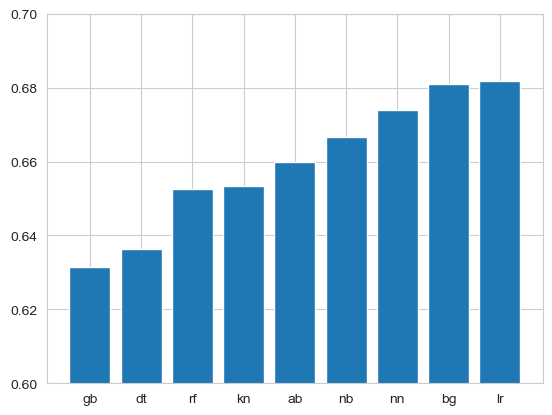

In [23]:
accuracies = [f1_score(y_val, lr.predict(X_val)), 
              f1_score(y_val, nb.predict(X_val)), 
              f1_score(y_val, kn.predict(X_val)),
              f1_score(y_val, dt.predict(X_val)), 
              f1_score(y_val, nn.predict(X_val)), 
              f1_score(y_val, bg.predict(X_val)),
              f1_score(y_val, ab.predict(X_val)), 
              f1_score(y_val, rf.predict(X_val)), 
              f1_score(y_val, gb.predict(X_val))]
models = ['lr','nb','kn','dt','nn','bg','ab','rf','gb']
data_tuples = list(zip(models,accuracies))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.bar(data[0], data[1])
plt.ylim(0.60,0.7)
plt.show()

### Apply stacking for the best two models... Can we increase performance?

__`Exercise - Step 5`__ Create a list of estimators that will contain the two best estimators obtained in the previous step according to the f1 score (done for you).

In [24]:
# done for you
estimators = [('bg', BaggingClassifier(random_state = 10)),
              ('lr', LogisticRegression(random_state = 10))]

__`Exercise - Step 6`__  Create a Stacking classifier and define the following parameters:<br><br>
    - `estimators = estimators` (the list defined in the previous step); <br>
    - `final_estimator = LogisticRegression()` (this is the default final estimator)

In [25]:
st = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()).fit(X_train, y_train)

__`Exercise - Step 7`__ - Similar to step `Exercise - Step 4`, plot the f1 score for all of the models and include this time the stacking classifier.

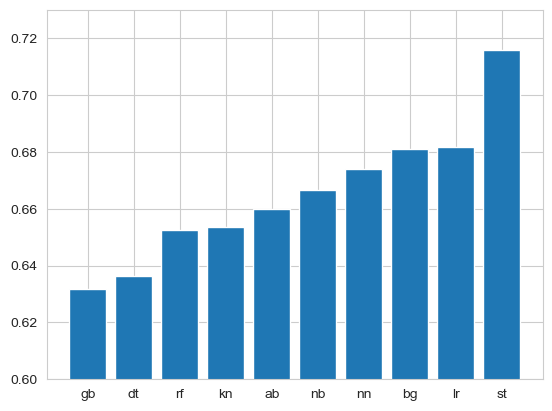

In [26]:
accuracies = [f1_score(y_val, lr.predict(X_val)), 
              f1_score(y_val, nb.predict(X_val)), 
              f1_score(y_val, kn.predict(X_val)),
              f1_score(y_val, dt.predict(X_val)), 
              f1_score(y_val, nn.predict(X_val)), 
              f1_score(y_val, bg.predict(X_val)),
              f1_score(y_val, ab.predict(X_val)), 
              f1_score(y_val, rf.predict(X_val)), 
              f1_score(y_val, gb.predict(X_val)),
              f1_score(y_val, st.predict(X_val))]
models = ['lr','nb','kn','dt','nn','bg','ab','rf','gb','st']
data_tuples = list(zip(models,accuracies))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.bar(data[0], data[1])
plt.ylim(0.6,0.73)
plt.show()

### What if I join the 3 best models?

__`Exercise - Step 8`__ - Check what are the results if you combine by stacking the predictions of the tree best models. 

In [27]:
estimators2 = [('bg', BaggingClassifier(random_state = 10)),
              ('lg', LogisticRegression(random_state = 10)),
              ('nn', MLPClassifier(max_iter = 5000, random_state = 10))]
st1 = StackingClassifier(estimators=estimators2, final_estimator=LogisticRegression()).fit(X_train, y_train)

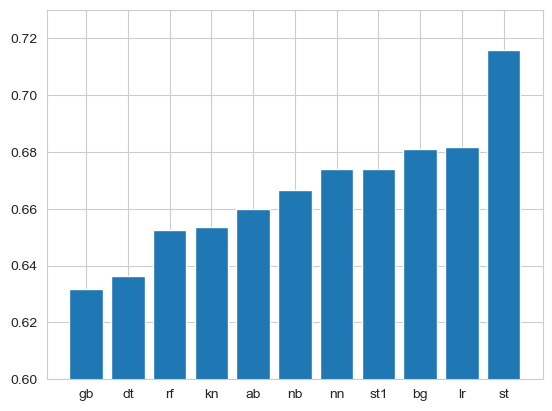

In [28]:
accuracies = [f1_score(y_val, lr.predict(X_val)), 
              f1_score(y_val, nb.predict(X_val)), 
              f1_score(y_val, kn.predict(X_val)),
              f1_score(y_val, dt.predict(X_val)), 
              f1_score(y_val, nn.predict(X_val)), 
              f1_score(y_val, bg.predict(X_val)),
              f1_score(y_val, ab.predict(X_val)), 
              f1_score(y_val, rf.predict(X_val)), 
              f1_score(y_val, gb.predict(X_val)),
              f1_score(y_val, st.predict(X_val)),
              f1_score(y_val, st1.predict(X_val))]
models = ['lr','nb','kn','dt','nn','bg','ab','rf','gb','st','st1']
data_tuples = list(zip(models,accuracies))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.bar(data[0], data[1])
plt.ylim(0.6,0.73)
plt.show()

### Using similar models

__`Exercise - Step 9`__ - This time, apply a stacking technique where you are going to stack two neural networks: <br>
- An MLPClassifier, with `hidden_layer_sizes = (20)`, `random_state = 10` and `max_iter = 5000` named as `nn1` <br>
- An MLPClassifier, with `hidden_layer_sizes = (100)`,`random_state = 10` and `max_iter = 5000` named as `nn2` <br>

Create a plot that will contain the results of all the previous models (the same as `Exercise - Step 7`), but also the result of this two neural networks individually and the resulting stacking.

In [29]:
nn1 = MLPClassifier(hidden_layer_sizes = (20), random_state = 10, max_iter = 5000).fit(X_train, y_train)
nn2 = MLPClassifier(hidden_layer_sizes = (100), random_state = 10, max_iter = 5000).fit(X_train, y_train)

lr = LogisticRegression(random_state = 10).fit(X_train, y_train)

estimators3 = [('nn1', MLPClassifier(hidden_layer_sizes = (20), random_state = 10, max_iter = 5000)),
              ('nn2', MLPClassifier(hidden_layer_sizes = (100), random_state = 10, max_iter = 5000))]
st2 = StackingClassifier(estimators=estimators3, final_estimator=LogisticRegression()).fit(X_train, y_train)

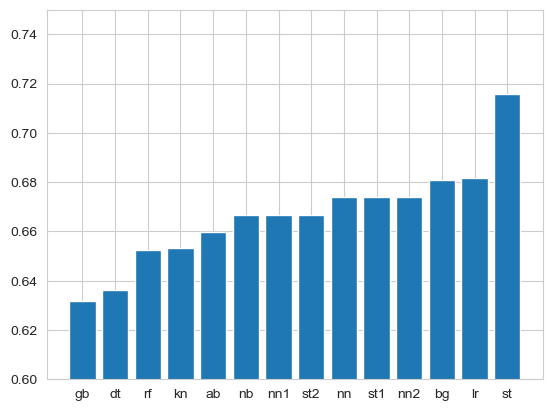

In [30]:
accuracies = [f1_score(y_val, lr.predict(X_val)), 
              f1_score(y_val, nb.predict(X_val)), 
              f1_score(y_val, kn.predict(X_val)),
              f1_score(y_val, dt.predict(X_val)), 
              f1_score(y_val, nn.predict(X_val)), 
              f1_score(y_val, bg.predict(X_val)),
              f1_score(y_val, ab.predict(X_val)), 
              f1_score(y_val, rf.predict(X_val)), 
              f1_score(y_val, gb.predict(X_val)),
              f1_score(y_val, st.predict(X_val)),
              f1_score(y_val, st1.predict(X_val)),
              f1_score(y_val, nn1.predict(X_val)),
              f1_score(y_val, nn2.predict(X_val)),
              f1_score(y_val, st2.predict(X_val))]
models = ['lr','nb','kn','dt','nn','bg','ab','rf','gb','st','st1','nn1','nn2','st2']
data_tuples = list(zip(models,accuracies))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.bar(data[0], data[1])
plt.ylim(0.6,0.75)
plt.show()

### Does it always improve?

__`Exercise - Step 10`__ - This time, apply a stacking technique where you are going to stack the first and the third best model achieved in `Exercise - Step 4`. <br> Create again a barplot with all the results.

In [31]:
estimators4 = [('lg', LogisticRegression(random_state = 10)),
               ('nn', MLPClassifier(max_iter = 5000, random_state = 10))]
st3 = StackingClassifier(estimators=estimators4, final_estimator=LogisticRegression()).fit(X_train, y_train)

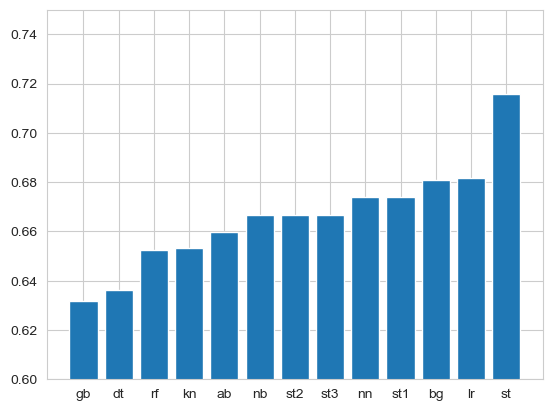

In [32]:
accuracies = [f1_score(y_val, lr.predict(X_val)), 
              f1_score(y_val, nb.predict(X_val)), 
              f1_score(y_val, kn.predict(X_val)),
              f1_score(y_val, dt.predict(X_val)), 
              f1_score(y_val, nn.predict(X_val)), 
              f1_score(y_val, bg.predict(X_val)),
              f1_score(y_val, ab.predict(X_val)), 
              f1_score(y_val, rf.predict(X_val)), 
              f1_score(y_val, gb.predict(X_val)),
              f1_score(y_val, st.predict(X_val)),
              f1_score(y_val, st1.predict(X_val)),
              f1_score(y_val, st2.predict(X_val)),
              f1_score(y_val, st3.predict(X_val))]
models = ['lr','nb','kn','dt','nn','bg','ab','rf','gb','st','st1','st2','st3']
data_tuples = list(zip(models,accuracies))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.bar(data[0], data[1])
plt.ylim(0.6,0.75)
plt.show()

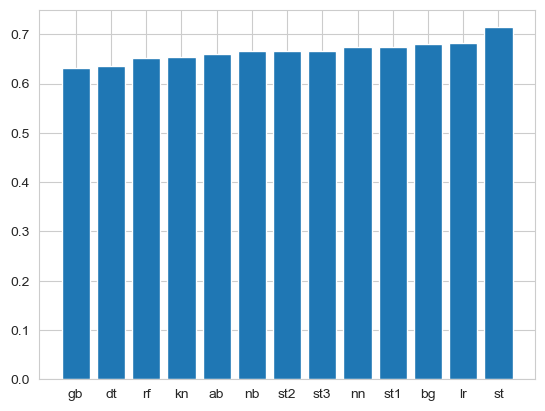

In [33]:
plt.bar(data[0], data[1])
plt.ylim(0,0.75)
plt.show()

### All done !!